Sa se normalizeze informatiile de la problema 1 si 2 folosind diferite metode de normalizare astfel:

problema 1 - durata anilor de studii universitare, vechimea in programare

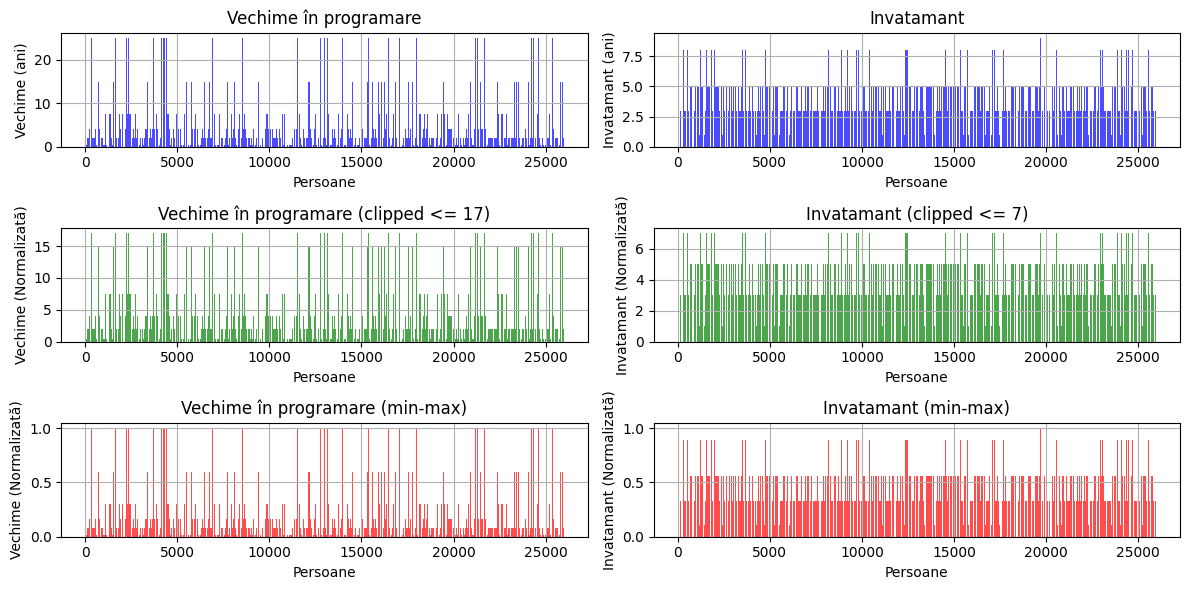

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer, RobustScaler
from win32ui import types

df = pd.read_csv("surveyDataSience.csv", skiprows=[1], header = 0, low_memory=False)
education_years = {
    "Master’s degree": 5,
    "Bachelor’s degree": 3,
    "Doctoral degree": 8,
    "Some college/university study without earning a bachelor’s degree": 1,
    "I prefer not to answer": 0,
    "No formal education past high school": 0,
    "Professional doctorate": 9
}
vechime = {
    "1-3 years": 2.0,
    "< 1 years": 0.5,
    "3-5 years": 4,
    "5-10 years": 7.5,
    "10-20 years": 15,
    "20+ years": 25,
    "I have never written code": 0
}


df_vechime = df['Q6'].map(vechime)
df_invatamant = df['Q4'].map(education_years)

df_vechime_clipped = df_vechime.clip(lower=0, upper=17)
df_invatamant_clipped = df_invatamant.clip(lower=0, upper=7)


scaler = MinMaxScaler()
df_vechime_min_max = scaler.fit_transform(df_vechime.values.reshape(-1, 1))
df_invatamant_min_max = scaler.fit_transform(df_invatamant.values.reshape(-1, 1))

fig, ax = plt.subplots(3, 2, figsize=(12, 6))

ax[0][0].bar(df_vechime.index, df_vechime, color='b', alpha=0.7)
ax[0][0].set_title('Vechime în programare')
ax[0][0].set_xlabel('Persoane')
ax[0][0].set_ylabel('Vechime (ani)')
ax[0][0].grid(True)


ax[1][0].bar(df_vechime_clipped.index, df_vechime_clipped, color='g', alpha=0.7)
ax[1][0].set_title('Vechime în programare (clipped <= 17)')
ax[1][0].set_xlabel('Persoane')
ax[1][0].set_ylabel('Vechime (Normalizată)')
ax[1][0].grid(True)


ax[2][0].bar(df_vechime.index, df_vechime_min_max.flatten(), color='r', alpha=0.7)
ax[2][0].set_title('Vechime în programare (min-max)')
ax[2][0].set_xlabel('Persoane')
ax[2][0].set_ylabel('Vechime (Normalizată)')
ax[2][0].grid(True)


ax[0][1].bar(df_invatamant.index, df_invatamant, color='b', alpha=0.7)
ax[0][1].set_title('Invatamant')
ax[0][1].set_xlabel('Persoane')
ax[0][1].set_ylabel('Invatamant (ani)')
ax[0][1].grid(True)


ax[1][1].bar(df_invatamant_clipped.index, df_invatamant_clipped, color='g', alpha=0.7)
ax[1][1].set_title('Invatamant (clipped <= 7)')
ax[1][1].set_xlabel('Persoane')
ax[1][1].set_ylabel('Invatamant (Normalizată)')
ax[1][1].grid(True)

ax[2][1].bar(df_invatamant.index, df_invatamant_min_max.flatten(), color='r', alpha=0.7)
ax[2][1].set_title('Invatamant (min-max)')
ax[2][1].set_xlabel('Persoane')
ax[2][1].set_ylabel('Invatamant (Normalizată)')
ax[2][1].grid(True)

# Afișează graficul cu cele două ploturi
plt.tight_layout()
plt.show()

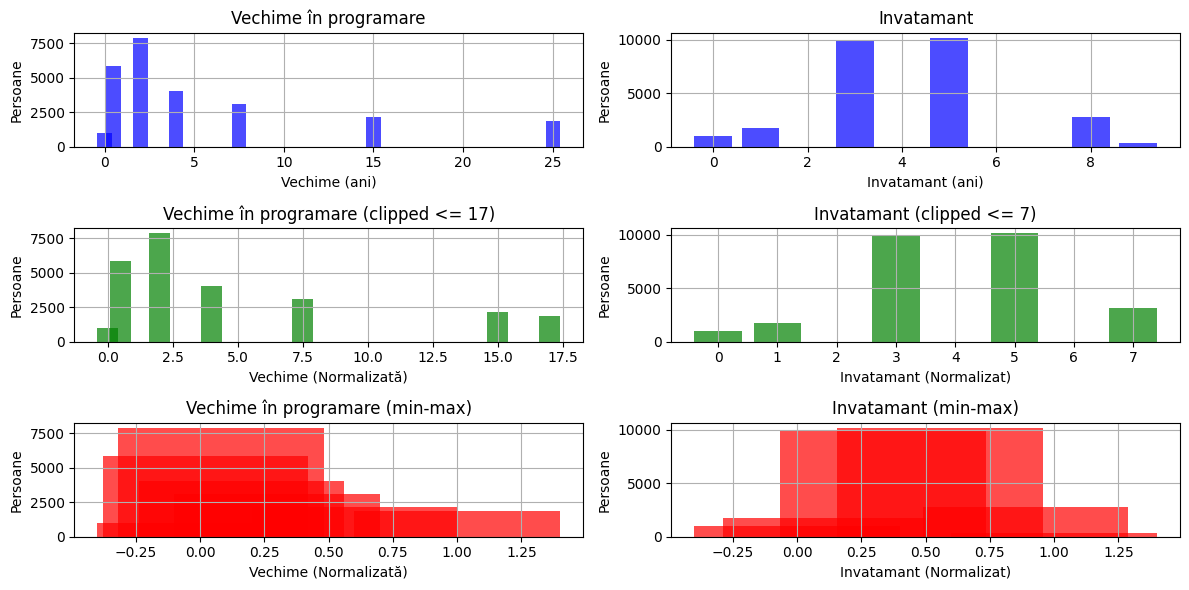

In [19]:
fig, ax = plt.subplots(3, 2, figsize=(12, 6))

numarare_vechime = df_vechime.value_counts()

ax[0][0].bar(numarare_vechime.index, numarare_vechime, color='b', alpha=0.7)
ax[0][0].set_title('Vechime în programare')
ax[0][0].set_xlabel('Vechime (ani)')
ax[0][0].set_ylabel('Persoane')
ax[0][0].grid(True)

numarare_vechime_clipped = df_vechime_clipped.value_counts()

ax[1][0].bar(numarare_vechime_clipped.index, numarare_vechime_clipped, color='g', alpha=0.7)
ax[1][0].set_title('Vechime în programare (clipped <= 17)')
ax[1][0].set_xlabel('Vechime (Normalizată)')
ax[1][0].set_ylabel('Persoane')
ax[1][0].grid(True)

numarare_vechime_min_max = pd.Series(df_vechime_min_max.flatten()).value_counts()

ax[2][0].bar(numarare_vechime_min_max.index, numarare_vechime_min_max, color='r', alpha=0.7)
ax[2][0].set_title('Vechime în programare (min-max)')
ax[2][0].set_xlabel('Vechime (Normalizată)')
ax[2][0].set_ylabel('Persoane')
ax[2][0].grid(True)

numarare_invatamant = df_invatamant.value_counts()

ax[0][1].bar(numarare_invatamant.index, numarare_invatamant, color='b', alpha=0.7)
ax[0][1].set_title('Invatamant')
ax[0][1].set_xlabel('Invatamant (ani)')
ax[0][1].set_ylabel('Persoane')
ax[0][1].grid(True)

numarare_invatamant_clipped = df_invatamant_clipped.value_counts()

ax[1][1].bar(numarare_invatamant_clipped.index, numarare_invatamant_clipped, color='g', alpha=0.7)
ax[1][1].set_title('Invatamant (clipped <= 7)')
ax[1][1].set_xlabel('Invatamant (Normalizat)')
ax[1][1].set_ylabel('Persoane')
ax[1][1].grid(True)

numarare_invatamant_min_max = pd.Series(df_invatamant_min_max.flatten()).value_counts()

ax[2][1].bar(numarare_invatamant_min_max.index, numarare_invatamant_min_max, color='r', alpha=0.7)
ax[2][1].set_title('Invatamant (min-max)')
ax[2][1].set_xlabel('Invatamant (Normalizat)')
ax[2][1].set_ylabel('Persoane')
ax[2][1].grid(True)

# Afișează graficul cu cele două ploturi
plt.tight_layout()
plt.show()